# Banana Collector Solved with DQN

This notebook uses the Unity ML-Agents environment from the first project of the [Udacity Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

Make sure you have followed the setup instruction in the `README.md` in this folder before running it.

## Import All Dependencies

In [1]:
%config IPCompleter.use_jedi = False
%matplotlib inline

In [2]:
import numpy as np
from unityagents import UnityEnvironment

import sys
sys.path.insert(0,'..')
from agents.dqn_agent import DQNAgent, DQNHyperparameters
from train_and_visualize_unity import train_agent, run_random_agent, run_trained_agent, TrainingHyperparameters

## Instantiate all Required Objects

In [3]:
# Instantiate environment
env = UnityEnvironment(file_name='./Banana_Windows_x86_64/Banana.exe')
brain_name = env.brain_names[0]

env_info = env.reset(train_mode=True)[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# DQN Hyperparameters
hp = DQNHyperparameters()

hp.BUFFER_SIZE = int(1e5)
hp.BATCH_SIZE = 128
hp.TAU = 5e-2


# Instantiate agent
from model import SimpleDQN

agent = DQNAgent(
    state_size=len(env_info.vector_observations[0]),
    action_size=env.brains[brain_name].vector_action_space_size, 
    seed=0,
    DQN=SimpleDQN,
    hyperparameters=hp
)

## Visualize the Random Agent

In [9]:
run_random_agent(env, brain_name)

## Train the Agent

A running average of the return over the last 100 episodes is maintained and plotted at the end. The training ends once the running average crosses 200.

Every episode has an upper limit of 1500 steps (that's quite generous for the LunarLander-v2 environment, actually)

TRAINING HYPERPARAMETERS:

Epsilon (Exploration vs Exploitation):
Starting Epsilon: 1.0
Epsilon Lower Limit: 0.01
Epsilon Decay: 0.99



DQN AGENT HYPERPARAMETERS:

Experience Replay and Reward Calculation:
Experience Replay Memory Size: 100000
Gamma (Reward Calculation Discount): 0.99

DQN Training:
Batch Size: 128
Learning Rate: 0.0005
Perform Optimization Every: 4 steps

Target DQN Update:
Double DQN: False
Hard Update: False
Hard Update Every: 128 steps
Soft Update Rate: 0.05



Episode 100	Average Score: 0.83
Episode 200	Average Score: 2.09
Episode 300	Average Score: 5.37
Episode 400	Average Score: 7.14
Episode 500	Average Score: 9.12
Episode 600	Average Score: 9.05
Episode 700	Average Score: 9.40
Episode 800	Average Score: 9.703
Episode 900	Average Score: 10.17
Episode 1000	Average Score: 11.40
Episode 1100	Average Score: 11.23
Episode 1200	Average Score: 11.55
Episode 1300	Average Score: 11.11
Episode 1400	Average Score: 11.03
Episode 1500	Average Score: 11.37
Episode 1600	Avera

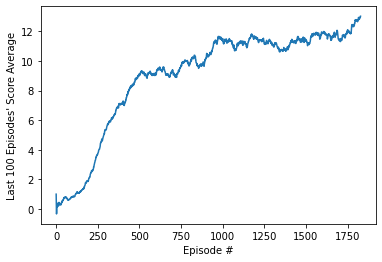

In [6]:
training_hp = TrainingHyperparameters()
training_hp.EPS_DECAY = 0.99

train_agent(   
    env=env,
    brain_name=brain_name,
    n_episodes=2000,
    hp=training_hp,
    agent=agent,
    completion_criteria=lambda scores_window: np.mean(scores_window) >= 13.0
)

## Visualize the Trained Agent

In [8]:
import torch
state_dict = torch.load('./trained_dqn.pth')
agent.current_dqn.load_state_dict(state_dict)
run_trained_agent(env, brain_name, agent)

## Close the Environment

In [8]:
env.close()